# Lecture 5: Introduction to R


## Note from Firas

Our series of R lectures will be presented by Dr. Tiffany Timbers, the other option co-director of the Vancouver MDS program.

Her lecture videos are not yet posted on YouTube, but I've got them locally so that's how we'll watch them.

### High level goal for part II of this course:

 Learn the R'isms of the R programming language.

### First, a bit of history about me

- Ph.D. in Neuroscience (2012)
- Started using R in ~ 2010 because I needed to do "complex" statistics
- Other programming languages I have used:
  - Turing
  - Java
  - Matlab
  - Python (only other language that I still currently use and remember)

Oh, and I like gifs, so you might see some in my lecture notes...

<img src="https://media.giphy.com/media/3PAL5bChWnak0WJ32x/giphy.gif" width=400>

## Now, a bit of history about R

- An implementation of the S programming language (created at Bell labs in 1976)

- written in C, Fortran, and R itself

- R was created by Ross Ihaka and Robert Gentleman (Statisticians from NZ)

- R is named partly after the authors and partly as a play on the name of S

- First stable beta version in 2000

<img src="http://revolution-computing.typepad.com/.a/6a010534b1db25970b01b8d2594d25970c-pi" width="600">

*Source: https://blog.revolutionanalytics.com/2016/03/16-years-of-r-history.html*

R currently has more than 15,000 additional packages (as of September 2018)!

### So, who's used R before?

### Let's start with a vignette

In [1]:
library(tidyverse, quietly = TRUE)
us_2015_econ <- read_csv("data/state_property_data.csv")
head(us_2015_econ)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Parsed with column specification:
cols(
  state = col_character(),
  med_income = col_double(),
  med_prop_val = col_double(),
  population = col_double(),
  mean_commute_minutes = col_double()
)


state,med_income,med_prop_val,population,mean_commute_minutes
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
AK,64222,197300,733375,10.46830
AL,36924,94800,4830620,25.30991
AR,35833,83300,2958208,22.40109
AZ,44748,128700,6641928,20.58786
CA,53075,252100,38421464,23.38085
CO,48098,198900,5278906,19.50792


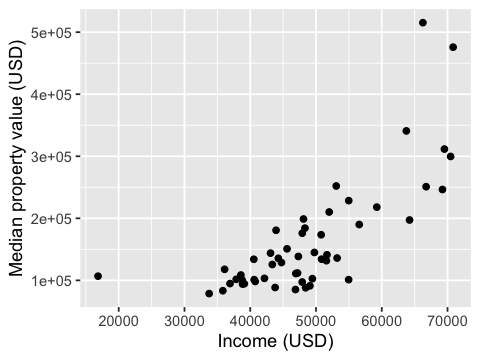

In [2]:
options(repr.plot.height = 3, repr.plot.width = 4)
ggplot(us_2015_econ, aes(x = med_income, y = med_prop_val)) +
  geom_point() +
  xlab("Income (USD)") +
  ylab("Median property value (USD)")

In [3]:
us_2016_vote <- read_csv("data/2016_presidential_election_state_vote.csv")
head(us_2016_vote)

Parsed with column specification:
cols(
  party = col_character(),
  state = col_character()
)


party,state
<chr>,<chr>
republican,AL
republican,AK
republican,AZ
republican,AR
democrat,CA
democrat,CO


In [4]:
us_data <- left_join(us_2015_econ, us_2016_vote)
head(us_data)

Joining, by = "state"


state,med_income,med_prop_val,population,mean_commute_minutes,party
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AK,64222,197300,733375,10.46830,republican
AL,36924,94800,4830620,25.30991,republican
AR,35833,83300,2958208,22.40109,republican
AZ,44748,128700,6641928,20.58786,republican
CA,53075,252100,38421464,23.38085,democrat
CO,48098,198900,5278906,19.50792,democrat


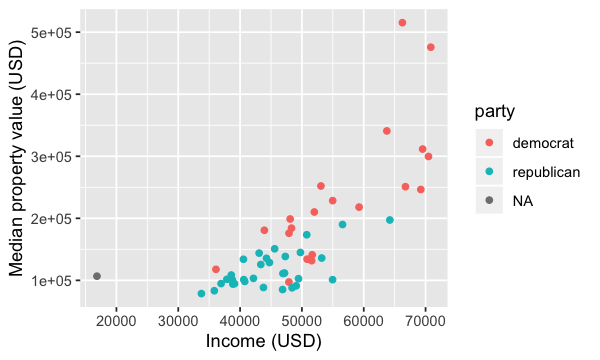

In [5]:
options(repr.plot.height = 3, repr.plot.width = 5)
ggplot(us_data, aes(x = med_income, y = med_prop_val, color = party)) +
  geom_point() +
  xlab("Income (USD)") +
  ylab("Median property value (USD)")

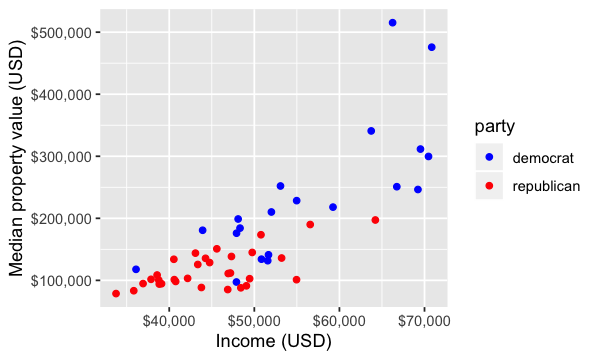

In [6]:
state_data <- filter(us_data, party != "Not Applicable")
ggplot(state_data, aes(x = med_income, y = med_prop_val, color = party)) +
    geom_point() +
    xlab("Income (USD)") +
    ylab("Median property value (USD)") +
    scale_colour_manual(values = c("blue", "red")) +
    scale_x_continuous(labels = scales::dollar_format()) +
    scale_y_continuous(labels = scales::dollar_format())

### The whole game

- What about this makes R an attractive language for data science?
- What is different about this R code compared to other common languages?
- How & why does R do these things? 

Answering these questions is the aim of the second part of this course!

### Lecture learning objectives:

By then end of the lecture & lab 3, students should be able to:
- Use the assignment symbol, `<-`, to assign values to objects in R and explain how it differs from `=`
- Create in R, and define and differentiate in English, the below listed key datatypes in R:
    - logical, numeric and character vectors
    - lists
    - data frames and tibbles
- Use R to determine the type and structure of an object
- Explain the distinction between names and values, and when R will copy an object


- Use the three subsetting operators, `[[`, `[`, and `$`, to subset single and multiple elements from vectors and data frames
- Compute numeric and boolean values using their respective types and operations
- Write conditional statements in R with `if`, `else if` and `else` to run different code depending on the input
- Write for loops in R to repeatedly run code
- Write R code that is human readable and follows the tidyverse style guide

### The assignment symbol, `<-`

- R came from S, S used `<-`
- S was inspired from APL, which also used `<-`
- APL was designed on a specific keyboard, which had a key for `<-`
- At that time there was no `==` for testing equality, it was tested with `=`, so something else need to be used for assignment.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/APL-keybd2.svg/410px-APL-keybd2.svg.png">

source: https://colinfay.me/r-assignment/

### The assigment symbol, `<-`

- Nowadays, `=` can also be used for assignment, however there are some things to be aware of...

- stylistically, `<-` is preferred over `=` for readability

- `<-` and `->` are valid in R, the latter can be useful in pipelines (more on this in data wrangling)

- `<-` and `=` have different emphasis in regards to environments

- **we expect you to use `<-` in MDS for object assignment in R** 

#### Assignment readability

Consider this code:

```
c <- 12
d <- 13
```

Which equality is easier to read? 

```
e = c == d
```

or

```
e <- c == d
```

#### Assignment environment

What value does x hold at the end of each of these code chunks?



```median(x = 1:10)```

vs

```median(x <- 1:10)```

In [8]:
median(y = 1:10)
x

ERROR: Error in is.factor(x): argument "x" is missing, with no default


In [13]:
median(x <- 1:10)
x

[1] 5.5

[1]  1  2  3  4  5  6  7  8  9 10

### What does assignment do in R?

When you type this into R: `x <- c(1, 2, 3)`

This is what R does: 

<img src="https://d33wubrfki0l68.cloudfront.net/bd90c87ac98708b1731c92900f2f53ec6a71edaf/ce375/diagrams/name-value/binding-1.png" width=300 algin="left">

*Source: [Advanced R](https://adv-r.hadley.nz/) by Hadley Wickham*

### What does assignment do in R?

And then if you type `y <- c(1, 2, 3)`

Then R does this:

<img src="https://d33wubrfki0l68.cloudfront.net/bdc72c04d3135f19fb3ab13731129eb84c9170af/f0ab9/diagrams/name-value/binding-2.png" width=300 algin="left">

*We are binding names like "x" and/or "y" to objects, not creating objects named something like "x" or "y".*

*Source: [Advanced R](https://adv-r.hadley.nz/) by Hadley Wickham*

### A note on names

#### Rules for syntactic names:
- May use: letters, digits, `.` and `_`
- Cannot begin with `_` or a digit
- Cannot use reserved words (e.g., `for`, `if`, `return`)

#### How to manage non-syntactic names
- Usually come across these when reading in someone else's data
- Backticks, \`, can be used manage these cases (e.g., ``` `_abc` <- 1 ```)
- If your data contains these, use R to rename things to make them syntactic (for your future sanity)

### Key datatypes in R

<img src="img/r_datatypes.png" width=1000>

*note - There are no scalars in R, they are represented by vectors of length 1.*

*Source: [Advanced R](https://adv-r.hadley.nz/) by Hadley Wickham*

- `NULL` is not a vector, but related and frequently functions in the role of a generic zero length vector.

#### What is a data frame?

From a data perspective, it is a rectangle where the rows are the observations:

<img src="https://ubc-dsci.github.io/introduction-to-datascience/img/obs.jpeg" width=800>

#### What is a data frame?

and the columns are the variables:

<img src="https://ubc-dsci.github.io/introduction-to-datascience/img/vars.jpeg" width=800>

#### What is a data frame? 

From a computer programming perspective, in R, a data frame is a special subtype of a list object whose elements (columns) are vectors.

<img src="https://ubc-dsci.github.io/introduction-to-datascience/img/vectors.jpeg" width=800>

**Question:** What do you notice about the elements of each of the vectors in this data frame?

#### What is a vector?

- objects that can contain 1 or more elements
- elements are ordered
- must all be of the same type (e.g., double, integer, character, logical)

<img src="https://ubc-dsci.github.io/introduction-to-datascience/img/vector.jpeg" width=800>

#### How are vectors different from a list?
<img src="https://ubc-dsci.github.io/introduction-to-datascience/img/vec_vs_list.jpeg" width=800>

#### Reminder: what do lists have to do with data frames?

<img src="https://ubc-dsci.github.io/introduction-to-datascience/img/dataframe.jpeg" width=800>

### A bit more about Vectors

Your closest and most important friend in R

<img src="https://media.giphy.com/media/EQCgmS4lwDS8g/giphy.gif" width=800>

#### Creating vectors and vector types

In [14]:
char_vec <- c("joy", "peace", "help", "fun", "sharing")
char_vec
typeof(char_vec)

[1] "joy"     "peace"   "help"    "fun"     "sharing"

[1] "character"

In [15]:
log_vec <- c(TRUE, TRUE, FALSE, FALSE, TRUE)
log_vec
typeof(log_vec)

[1]  TRUE  TRUE FALSE FALSE  TRUE

[1] "logical"

In [16]:
double_vec <- c(1, 2, 3, 4, 5)
double_vec
typeof(double_vec)

[1] 1 2 3 4 5

[1] "double"

In [17]:
int_vec <- c(1L, 2L, 3L, 4L, 5L)
int_vec
typeof(int_vec)

[1] 1 2 3 4 5

[1] "integer"

`str` is a useful command to get even more information about an object:

In [18]:
str(int_vec)

 int [1:5] 1 2 3 4 5


#### What happens to vectors of mixed type?



In [19]:
mixed_vec <- c("joy", 5.6, TRUE, 1L, "sharing")
typeof(mixed_vec)

[1] "character"

Hierarchy for coercion:

character → double → integer → logical

#### Useful functions for testing type and forcing coercion:

- `is.logical()`, `is.integer()`, `is.double()`, and `is.character()` returns `TRUE` or `FALSE`, depending on type of object and function used.
- `as.logical()`, `as.integer()`,` as.double()`, or `as.character()` coerce vector to type specified by function name. 

#### How to subset and modify vectors

<img src="https://media.giphy.com/media/l4pTocra1lFDomV5S/giphy.gif" width=700>

#### Subsetting 

- REMEMBER - R counts from 1!!!

In [20]:
name <- c("T", "i", "f", "f", "a", "n", "y")

What letter will I get in R? What would I get in Python?

In [21]:
name[3]

[1] "f"

What letters will I get in R? What would I get in Python?

In [22]:
name[2:4]

[1] "i" "f" "f"

What letter will I get in R? What would I get in Python?

In [23]:
name[-1]

[1] "i" "f" "f" "a" "n" "y"

How do I get the last element in a vector in R?

In [24]:
name[length(name)]

[1] "y"

#### Modifing vectors

We can combine the assignment symbol and subsetting to modify vectors:

In [25]:
name

[1] "T" "i" "f" "f" "a" "n" "y"

In [26]:
name[1] <- "t"
name

[1] "t" "i" "f" "f" "a" "n" "y"

In [27]:
name[1:3] <- c("T", "I", "F")
name
name[8:12]

[1] "T" "I" "F" "f" "a" "n" "y"

[1] NA NA NA NA NA

In [28]:
name[8:12] <- c("-", "A", "n", "n", "e")
name

[1] "T" "I" "F" "f" "a" "n" "y" "-" "A" "n" "n" "e"

#### What happens when you modify a vector in R?

Consider:

```
x <- c(1, 2, 3)
y <- x

y[3] <- 4
x
#> [1] 1 2 3
```

What is happening in R's memory for each line of code?


|Code | R's memory representation |
|---|---| 
| `x <- c(1, 2, 3)` | <img src="https://d33wubrfki0l68.cloudfront.net/bd90c87ac98708b1731c92900f2f53ec6a71edaf/ce375/diagrams/name-value/binding-1.png" width=200 algin="left"> |
| `y <- x` | <img src="https://d33wubrfki0l68.cloudfront.net/bdc72c04d3135f19fb3ab13731129eb84c9170af/f0ab9/diagrams/name-value/binding-2.png" width=200 algin="left"> |
| `y[[3]] <- 4` | <img src="https://d33wubrfki0l68.cloudfront.net/ef9f480effa2f1d0e401d1f94218d0cf118433c0/b56e9/diagrams/name-value/binding-3.png" width=200 algin="left"> |

This is called "copy-on-modify".

*Source: [Advanced R](https://adv-r.hadley.nz/) by Hadley Wickham*

<img src="img/copy-on-modify.png" width=500>

This is called "copy-on-modify".

*Source: [Advanced R](https://adv-r.hadley.nz/) by Hadley Wickham*

#### Why copy-on-modify
- Since there are no scalars in R, vectors are essentially immutable
- If you change one element of the vector, you have to copy the whole thing to update it

#### Why do we care about knowing this?
- Given that data frames are built on-top of vectors, this has implications for speed when working with large data frames

#### Why vectors? 

Vectorized operations! 

In [29]:
c(1, 2, 3, 4) + c(1, 1, 1, 1)

[1] 2 3 4 5

But watch out for vector recycling in R!

This makes sense:

In [30]:
c(1, 2, 3, 4) + c(1)

[1] 2 3 4 5

but this does not!

In [31]:
c(1, 2, 3, 4) + c(1, 2)

[1] 2 4 4 6

A list of vector operators here:  [R Operators cheat sheet](https://cran.r-project.org/doc/contrib/Baggott-refcard-v2.pdf)

One to watch out for, logical and (`&`) and or (`|`) operators come in both an elementwise and first element comparison form, for example:

In [54]:
# compares each elements of each vector by position
c(TRUE, TRUE, TRUE) & c(FALSE, TRUE, TRUE)

[1] FALSE  TRUE  TRUE

In [53]:
# compares only the first elements of each vector
c(TRUE, TRUE, TRUE) && c(FALSE, TRUE, TRUE)

[1] FALSE

### Extending our knowledge to data frames

<img src="https://ubc-dsci.github.io/introduction-to-datascience/img/dataframe.jpeg" width=800>

#### Getting to know a data frame

In [34]:
head(us_data)

state,med_income,med_prop_val,population,mean_commute_minutes,party
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AK,64222,197300,733375,10.46830,republican
AL,36924,94800,4830620,25.30991,republican
AR,35833,83300,2958208,22.40109,republican
AZ,44748,128700,6641928,20.58786,republican
CA,53075,252100,38421464,23.38085,democrat
CO,48098,198900,5278906,19.50792,democrat


In [35]:
str(us_data)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	52 obs. of  6 variables:
 $ state               : chr  "AK" "AL" "AR" "AZ" ...
 $ med_income          : num  64222 36924 35833 44748 53075 ...
 $ med_prop_val        : num  197300 94800 83300 128700 252100 ...
 $ population          : num  733375 4830620 2958208 6641928 38421464 ...
 $ mean_commute_minutes: num  10.5 25.3 22.4 20.6 23.4 ...
 $ party               : chr  "republican" "republican" "republican" "republican" ...


#### Subsetting and modifying data frames

There are 3 operators that can be used when subsetting data frames: `[`, `$` and `[[`

<img src="img/subsetting.png" width=1200>

Note that `$` and `[[` remove a level of structure from the data frame (this happens with lists too).

#### Subsetting and modifying data frames

There are 3 operators that can be used when subsetting data frames: `[`, `$` and `[[`

| Operator | Example use | What it returns |
|----------|-------------|-----------------|
| `[`      | `us_data[1:10, 2:4]`     | rows 1-10 for columns 2-4 of the data frame, as a data frame |
| `[`      | `us_data[1:10, ]`     | rows 1-10 for all columns of the data frame, as a data frame |
| `[`     | `us_data[1]` | the first column of the data frame, as a data frame |
| `[[`     | `us_data[[1]]` | the first column of the data frame, as a vector |
| `$`      | `us_data$state` | the column the corresponds to the name that follows the `$`, as a vector | 

Note that `$` and `[[` remove a level of structure from the data frame object (this happens with lists too).

#### Logical indexing of data frames

We can also use logical statements to filter for rows containing certain values, or values above or below a threshold:

In [36]:
us_data[us_data$party == "republican", ]

state,med_income,med_prop_val,population,mean_commute_minutes,party
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AK,64222.0,197300,733375,10.46830,republican
AL,36924.0,94800,4830620,25.30991,republican
AR,35833.0,83300,2958208,22.40109,republican
AZ,44748.0,128700,6641928,20.58786,republican
FL,43355.0,125600,19645772,24.78056,republican
GA,37865.0,101700,10006693,24.54914,republican
IA,49448.0,102700,3093526,18.35024,republican
ID,43080.5,143900,1616547,19.85348,republican
IN,47194.0,111800,6568645,23.51750,republican


Another example:

In [37]:
us_data[us_data$mean_commute_minutes > 25, ]

state,med_income,med_prop_val,population,mean_commute_minutes,party
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AL,36924.0,94800,4830620,25.30991,republican
DC,70848.0,475800,647484,28.25340,democrat
LA,40757.5,98250,4625253,25.91754,republican
MD,66745.5,250950,5930538,28.61998,democrat
MS,33748.5,78700,2988081,25.55173,republican
NJ,70471.0,299700,8904413,28.80077,democrat
PR,16851.5,106750,3583073,28.02170,NA
SC,38769.5,100450,4777576,25.11677,republican
TN,38576.0,108600,6499615,25.52855,republican


#### Modifing data frames

Similar to vectors, we can combine the assignment symbol and subsetting to modify data frames.

For example, here we create a new column called `mean_commute_hours`:

In [38]:
us_data$mean_commute_hours <- us_data$mean_commute_minutes / 50
head(us_data)

state,med_income,med_prop_val,population,mean_commute_minutes,party,mean_commute_hours
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
AK,64222,197300,733375,10.46830,republican,0.2093660
AL,36924,94800,4830620,25.30991,republican,0.5061981
AR,35833,83300,2958208,22.40109,republican,0.4480218
AZ,44748,128700,6641928,20.58786,republican,0.4117572
CA,53075,252100,38421464,23.38085,democrat,0.4676170
CO,48098,198900,5278906,19.50792,democrat,0.3901584


The same syntax works to overwrite an existing column.

#### What happens when we modify an entire column? or a row?

To answer this we need to look at how data frames are represented in R's memory.

#### How R represents data frames:

- Remember that data frames are lists of vectors
- As such, they don't store the values themselves, they store references to them:

```d1 <- data.frame(x = c(1, 5, 6), y = c(2, 4, 3))```

<img src="https://d33wubrfki0l68.cloudfront.net/80d8995999aa240ff4bc91bb6aba2c7bf72afc24/95ee6/diagrams/name-value/dataframe.png" width="200">

*Source: [Advanced R](https://adv-r.hadley.nz/) by Hadley Wickham*

#### How R represents data frames:

If you modify a column, only that column needs to be modified; the others will still point to their original references:

``` d2 <- d1
d2[, 2] <- d2[, 2] * 2```

<img src="https://d33wubrfki0l68.cloudfront.net/c19fd7e31bf34ceff73d0fac6e3ea22b09429e4a/23d8d/diagrams/name-value/d-modify-c.png" width="250">

*Source: [Advanced R](https://adv-r.hadley.nz/) by Hadley Wickham*

#### How R represents data frames:

However, if you modify a row, every column is modified, which means every column must be copied:

```d3 <- d1
d3[1, ] <- d3[1, ] * 3```

<img src="https://d33wubrfki0l68.cloudfront.net/36df61f54d1ac62e066fb814cb7ba38ea6047a74/facf8/diagrams/name-value/d-modify-r.png" width="400">

*Source: [Advanced R](https://adv-r.hadley.nz/) by Hadley Wickham*

#### An exception to copy-on-modify

If an object has a single name bound to it, R will modify it in place:

```v <- c(1, 2, 3)```

<img src="https://d33wubrfki0l68.cloudfront.net/496ac87edf04d7e235747c3cf4a4e66deca754f2/3ac04/diagrams/name-value/v-inplace-1.png" width="200">

```v[[3]] <- 4```

<img src="https://d33wubrfki0l68.cloudfront.net/a6ef7ab337f156cdb2c21816923368383bc2e858/1f8bb/diagrams/name-value/v-inplace-2.png" width="200">


- Hence, modify in place can be a useful optimization for speeding up code.
- However, there are some complications that make predicting exactly when R applies this optimisation challenging (see [here](https://adv-r.hadley.nz/names-values.html#modify-in-place) for details)
- There is one other time R will do this, we will cover this when we get to environments.

*Source: [Advanced R](https://adv-r.hadley.nz/) by Hadley Wickham*

### Control Flow: `for` loops

- For loops in R, work like this: `for (item in vector) perform_action`
- When code needs to be split across lines in R, we use the `{` operator to surround it

#### Challenge or, are you still awake ;p 

Rearrange this code to make a working for loop in R. Then discuss with your neighbour when the index is updated.

In [39]:
## Answer

for (i in 1:3) {
    i <- i * 2
    print(i)
}
 

[1] 2
[1] 4
[1] 6


### Pro-tip for `for` loops in R

Beware of this:

In [40]:
means <- c()
for (i in 1:length(means)) {
  print(i)
}

[1] 1
[1] 0


That might seem not too bad, but it is if you are trying to actually do something:

In [41]:
means <- c()
out <- vector("list", length(means))
for (i in 1:length(means)) {
  out[[i]] <- rnorm(10, means[[i]])
}

ERROR: Error in rnorm(10, means[[i]]): invalid arguments


What went wrong here and how can we avoid it?


This occurs because `:` works with both increasing and decreasing sequences:

In [42]:
1:length(means)

[1] 1 0

*Source: [Advanced R](https://adv-r.hadley.nz/) by Hadley Wickham*

### Pro-tip for `for` loops in R

Use `seq_along(x)` instead. It always returns a value the same length as `x`:

In [43]:
seq_along(means)

integer(0)

In [44]:
means <- c()
for (i in seq_along(means)) {
  print(i)
}

In [45]:
means <- c()
out <- vector("list", length(means))
for (i in seq_along(means)) {
  out[[i]] <- rnorm(10, means[[i]])
}

*Source: [Advanced R](https://adv-r.hadley.nz/) by Hadley Wickham*

### Control Flow: `if`, `if else` and `else` statements 

The basic form of an if statement in R is as follows:

`if (condition) true_action`

`if (condition) true_action else false_action`

- Again, when code needs to be split across lines in R, we use the `{` operator to surround it to create code blocks

#### Challenge or, are you still awake ;p 

Rearrange this code to make a working `if`, `if else` and `else` statement in R.

In [46]:
## Answer

threshold <- 95.0
measure  <- 93.5

if (measure > threshold) {
    print("Over the limit")
} else if (measure < threshold) {
    print("Under the limit")
} else {
    print("Exactly at threshold")
}

[1] "Under the limit"


### Writing readable R code

- WriTing AND reading    (code) TaKes cognitive RESOURCES, & We only hAvE so MUCh! 

- To help free up cognitive capacity, we will follow the [tidyverse style guide](https://style.tidyverse.org/index.html)

#### Sample code **not** in tidyverse style

Can we spot what's wrong?

#### Sample code in tidyverse style

### What did we learn today?

- 
 
- 

- 


## Additional resources:
- [RStudio base R cheat sheet](https://www.rstudio.com/wp-content/uploads/2016/10/r-cheat-sheet-3.pdf)
- [R Operators cheat sheet](https://cran.r-project.org/doc/contrib/Baggott-refcard-v2.pdf)

## Attribution:
- [Advanced R](https://adv-r.hadley.nz/) by Hadley Wickham
- [Why do we use arrow as an assignment operator?](https://colinfay.me/r-assignment/) by Colin Fay